In [2]:
from firebase import firebase
import pandas as pd
import firebase_admin
from firebase_admin import credentials,firestore
import time
import datetime

In [3]:
cred = credentials.Certificate('serviceAccountKey.json')
default_app = firebase_admin.initialize_app(cred)
db = firestore.client()

In [4]:
t = time.time()
a = 1
while True:
    tt=time.time()
    if tt - t > 5:
        ti = datetime.datetime.fromtimestamp(tt).strftime('%Y-%m-%d %H:%M:%S')
        print(ti)
        doc_ref = db.collection('NODO').document(ti)
        doc_ref.set({'TEMPERATURA':a,'HUMEDAD RELATIVA':a+1,
                     'HUMEDAD DE LA TIERRA':a-2,'INTENSIDAD LUMÍNICA':a*2})
        a += 1
        t = tt

2018-11-27 17:30:09
2018-11-27 17:30:14
2018-11-27 17:30:19
2018-11-27 17:30:24
2018-11-27 17:30:29
2018-11-27 17:30:34
2018-11-27 17:30:39
2018-11-27 17:30:44


KeyboardInterrupt: 

In [5]:
doc_ref= db.collection('NODO')
docs = doc_ref.get()
fecha, variables = [], []
for doc in docs:
    fecha.append(doc.id)
    variables.append(doc.to_dict())

In [6]:
fe = [pd.Timestamp(x) for x in fecha]
var = pd.DataFrame(variables)
var.index = fe
var

,HUMEDAD DE LA TIERRA,HUMEDAD RELATIVA,INTENSIDAD LUMÍNICA,TEMPERATURA
2018-11-22 21:07:00,-1,2,2,1
2018-11-22 21:08:00,0,3,4,2
2018-11-22 21:09:00,1,4,6,3
2018-11-22 21:10:00,2,5,8,4
2018-11-22 21:11:00,3,6,10,5
2018-11-22 21:12:00,4,7,12,6
2018-11-22 21:13:00,5,8,14,7
2018-11-22 21:14:00,6,9,16,8
2018-11-22 21:15:00,7,10,18,9
2018-11-22 21:16:00,8,11,20,10


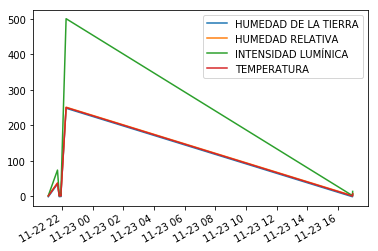

In [9]:
var.plot()